# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 6 (Friday) 11:00 pm </font>  

<font color="blue"> Sanika Suhas Pol </font>

# I. Overview

The objective of this assignment is to learn about deep learning and apply in on our data using Tensorflow or Keras. We are suppose to choose 3 differnent netwrork structures and experiment on those. 

# II. Data


<font> This dataset is about intension of a customer shopping online. It consists of 12330 entries and 18 attributes. The target label 'Revenue' has binary values true or false which suggest whether the customer will purchase the product or not. The data has 10 numerical attributes and 8 categorical attributes. <br><font/>
Following is the description of the attributes:

|        Name                   |  Description                        |
|:------------------------------|:------------------------------------|
|        Administrative         |Number of pages visited by the visitor about account management             |
|Administrative_Duration        |Total amount of time (in seconds) spent by the visitor on account management related pages 
|Informational                  |Number of pages visited by the visitor about Web site,                             communication and address information of the shopping site
|Informational_Duration         |Total amount of time (in seconds) spent by the visitor on informational pages
|ProductRelated                 |Number of pages visited by visitor about product related pages
|ProductRelated_Duration        |Total amount of time (in seconds) spent by the visitor on product related pages
|BounceRates                    |Average bounce rate value of the pages visited by the visitor
|ExitRates                      |Average exit rate value of the pages visited by the visitor
|PageValues                     |Average page value of the pages visited by the visitor
|SpecialDay                     |Closeness of the site visiting time to a special day
|Month                          |Month value of the visit date
|OperatingSystems               |Operating system of the visitor
|Browser                        |Browser of the visitor 
|Region                         |Geographic region from which the session has been started by the visitor
|TrafficType                    |Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
|VisitorType                    |Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
|Weekend                        |Boolean value indicating whether the date of the visit is weekend
|Revenue                        |Class label indicating whether the visit has been finalized with a transaction

I got this data from the UCI machine learning repositary. Following is the link where this data can be found.<br> 
<a href="https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset">
Online Shoppers Purchasing Intention Dataset</a>

In [0]:
import timeit
start_time = timeit.default_timer()


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
df = pd.read_csv('/content/gdrive/My Drive/ML/Assignments/5/online_shoppers_intention.csv')
#df = pd.read_csv(online_shoppers_intention.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [37]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [38]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [39]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

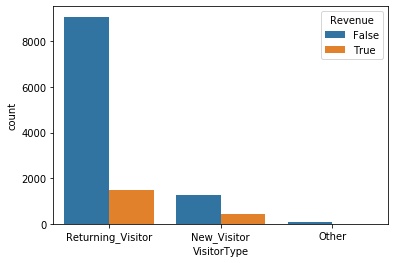

In [40]:
sns.countplot(x = "VisitorType" , hue = 'Revenue' ,data = df)

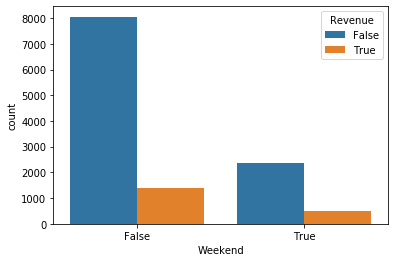

In [41]:
sns.countplot(x = 'Weekend', hue = 'Revenue' ,data = df)

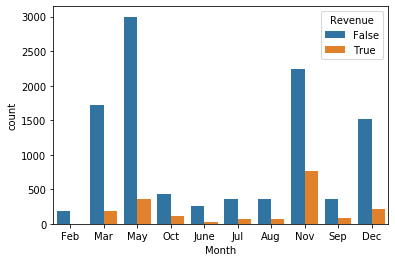

In [42]:
sns.countplot(x = 'Month', hue = 'Revenue' ,data = df)

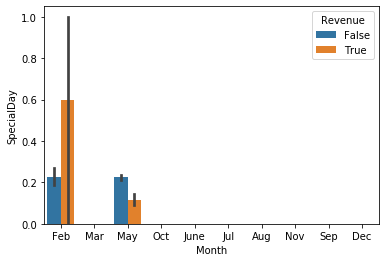

In [43]:
sns.barplot(x = 'Month', y = 'SpecialDay' ,hue = 'Revenue',data = df) 

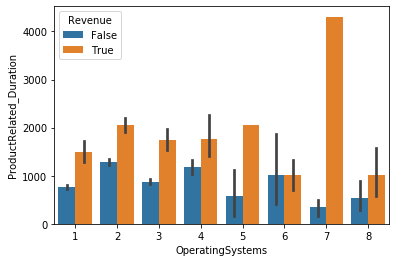

In [44]:
sns.barplot(x = 'OperatingSystems', y = 'ProductRelated_Duration' ,hue = 'Revenue',data = df) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


([<matplotlib.patches.Wedge at 0x7faff0e5eef0>,
 [Text(0.9725550024353202, 0.5139423773518141, 'True'),
  Text(-0.9725549783759403, -0.5139424228803988, 'Flase')])

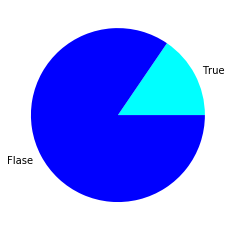

In [45]:
df_revenue = df[['Revenue']]
tCount = df_revenue[df_revenue['Revenue']==1].count()
fCount = df_revenue[df_revenue['Revenue']==0].count()
s = [[tCount,fCount]]
plt.pie(x = s, labels = ['True','Flase'], colors = ['cyan','blue'])

In [0]:
le = LabelEncoder()
label_month = le.fit_transform(df['Month'])
label_visitorType = le.fit_transform(df['VisitorType'])
label_weekend = le.fit_transform(df['Weekend'])
label_revenue = le.fit_transform(df['Revenue'])

In [47]:
df.drop(['Month'],axis =1) 
df['Month'] = label_month
df.drop(['VisitorType'],axis =1) 
df['VisitorType'] = label_visitorType
df.drop(['Weekend'],axis =1) 
df['Weekend'] = label_weekend
df.drop(['Revenue'],axis =1) 
df['Revenue'] = label_revenue
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [48]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


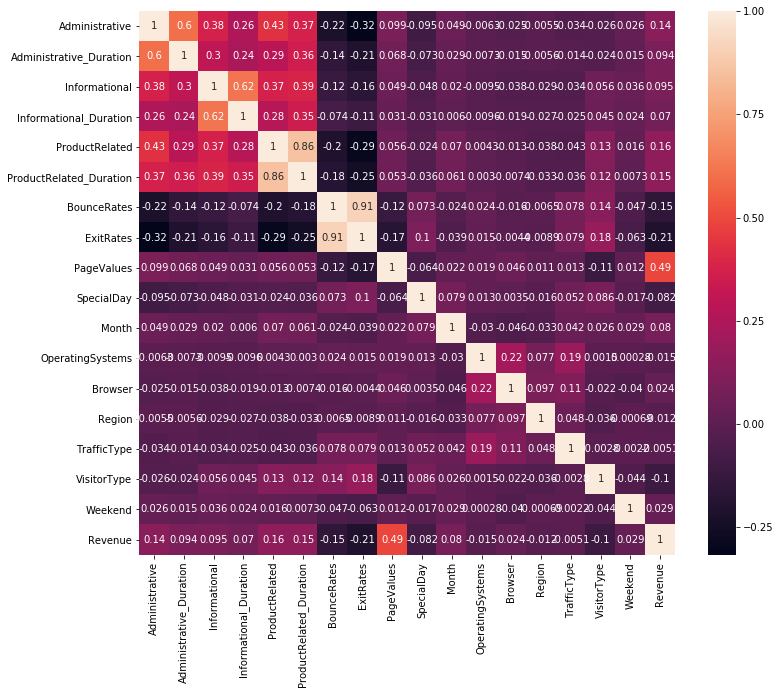

In [49]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = corr, annot = True,cbar = True)

## Preliminary observation

<font>I have plotted various graphs to check how the customer is shopping. Whether the customer will buy the product and complete the transaction or not and hence will the revenue be generated or not. Following are the observations:<br>
<ul style="list-style-type:circle;">
    <li>People from region 1 and 3 are more active in browsing the website. However not lot of them complete the transaction.</li>
    <li>If a customer is returning again, there is a less chance that he or she will complete the transaction.</li>
    <li>The number of people visiting the website and more on weekdays then weekends.</li>
    <li>A lot of browsing or window shopping is done in the months of March, May, November and December compared to other months.</li>
    <li>A lot of customer completed the transactions in month if February on a special day.</li> 
    <li>Incase of product related pages, more the customer accesses these pages or spends time on these pages, more revenue is generated as the customer completed the transactions.</li></ul>
To conclude a lot of customers tend to just browse the website but not actually buy a product. The graphs can also indicate that the customers might be browsing a product multiple times before buying it, thus increasing the count of false vales in the revenue column.
</font>

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from sklearn.model_selection import train_test_split
import keras
from keras import models,layers,losses,optimizers,metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dense, Activation, Dropout
import matplotlib.patches as mpatches

In [0]:
X = df.drop(['Revenue'],axis = 1)   
T = df[['Revenue']]
normalize = StandardScaler()
normalized_X = normalize.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, T, test_size=0.2, random_state=1)

In [0]:
def plot_metrics(result_hist):
    plt.title('Validation Accuracy')
    plt.plot(range(len(result_hist['val_acc'])), result_hist['val_acc'])
    plt.show()
    plt.title('Validation Loss')
    plt.plot(range(len(result_hist['val_loss'])),result_hist['val_loss'])
    plt.show()
    plt.title('Train Accuracy')
    plt.plot(range(len(result_hist['acc'])),result_hist['acc'])
    plt.show()
    plt.title('Loss')
    plt.plot(range(len(result_hist['loss'])),result_hist['loss'])
    plt.show()

## Summary of the choice of networks.
In this assignment I have used the Sequential model in Keras to implement three different neural network structures. In the sequential model in Keras we can create different neural network strcutures by changing the number of neurons for each activation fucntion that has been used. Also we have different types of optimizers which I have used to understand and implement the sequential model in Keras.

Model 1 has been constructed with 5 layer and the input layer and output layer has lesser number of neurons than the hidden layers. This model will show us how the input gets distributed and how it converges when hidden layers are more taller than the input and output layer.

Model 2 has been constructed with 8 layer and the units are in decreasing order from the input layer to the output layer. This model will show us how the features are extracted from layers to layers as the units decrease, feature extraction becomes stronger. As the input layer has 48 neurons and the output has just 2, the hidden units have the crucial task of extracting the features from 48 units to fit and map to those 2 output neurons.
As the units in all the layers, are decreasing with a ratio. feature extraction will be better with a rational decrease. Also, the data could underfit or overfit.

Model 3 has been constructed with 9 layers and the units are like pallindrome from the input layer to the output layer.
The purpose of this network architecture is to actually see how the feature extraction contracts till a single neuron and then again expands to maximum units in this network. I wanted to see how it makes the difference when features are first tightly contracted and then again expanded. 
As the units in all the layers are in pallindrome there is a possibility that the network will not imporve accuracy at all. Also, the data could underfit or overfit.


Train on 9864 samples, validate on 2466 samples
Epoch 1/10
9864/9864 [==============================] - 1s 107us/step - loss: 1.1332 - acc: 0.8032 - val_loss: 0.3826 - val_acc: 0.8577
Epoch 2/10
9864/9864 [==============================] - 1s 53us/step - loss: 0.4177 - acc: 0.8420 - val_loss: 0.3578 - val_acc: 0.8577
Epoch 3/10
9864/9864 [==============================] - 1s 51us/step - loss: 0.4973 - acc: 0.8004 - val_loss: 0.4214 - val_acc: 0.8577
Epoch 4/10
9864/9864 [==============================] - 1s 52us/step - loss: 0.4179 - acc: 0.8422 - val_loss: 0.3700 - val_acc: 0.8577
Epoch 5/10
9864/9864 [==============================] - 1s 52us/step - loss: 0.3907 - acc: 0.8422 - val_loss: 0.3473 - val_acc: 0.8577
Epoch 6/10
9864/9864 [==============================] - 1s 51us/step - loss: 0.3762 - acc: 0.8422 - val_loss: 0.3316 - val_acc: 0.8577
Epoch 7/10
9864/9864 [==============================] - 1s 52us/step - loss: 0.3594 - acc: 0.8422 - val_loss: 0.3190 - val_acc: 0.8577
Epoch 

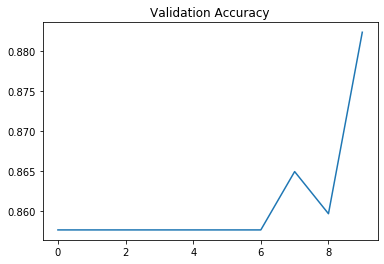

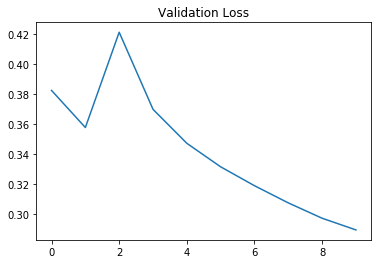

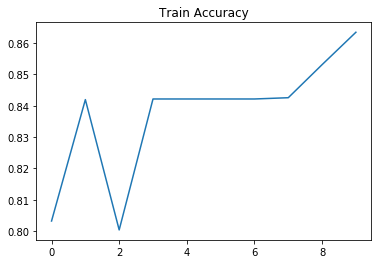

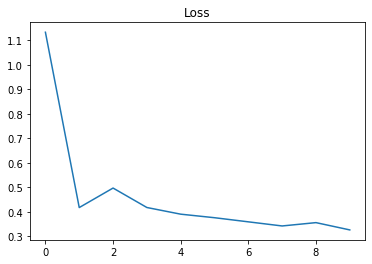

In [53]:
model_1 = keras.models.Sequential()
neurons = [3,4,4,4,2]
for layer in neurons:
    model_1.add(layers.Dense(input_dim=X_train.shape[1],units=layer,activation='tanh'))
model_1.add(layers.Dense(units=1,activation='tanh'))
optimizer1 = optimizers.adam(lr=0.003)
model_1.compile(optimizer1,loss='binary_crossentropy',metrics=['accuracy'])
results_of_model1 = model_1.fit(X_train,y_train,epochs = 10,validation_data=[X_test,y_test],verbose=1)
plot_metrics(results_of_model1.history)

Train on 9864 samples, validate on 2466 samples
Epoch 1/10
9864/9864 [==============================] - 1s 80us/step - loss: 0.3449 - acc: 0.8624 - val_loss: 0.2927 - val_acc: 0.8804
Epoch 2/10
9864/9864 [==============================] - 1s 56us/step - loss: 0.3139 - acc: 0.8759 - val_loss: 0.2883 - val_acc: 0.8905
Epoch 3/10
9864/9864 [==============================] - 1s 55us/step - loss: 0.3239 - acc: 0.8830 - val_loss: 0.2691 - val_acc: 0.8917
Epoch 4/10
9864/9864 [==============================] - 1s 54us/step - loss: 0.3086 - acc: 0.8869 - val_loss: 0.2727 - val_acc: 0.8950
Epoch 5/10
9864/9864 [==============================] - 1s 60us/step - loss: 0.3402 - acc: 0.8873 - val_loss: 0.2699 - val_acc: 0.8938
Epoch 6/10
9864/9864 [==============================] - 1s 57us/step - loss: 0.2899 - acc: 0.8905 - val_loss: 0.2621 - val_acc: 0.8921
Epoch 7/10
9864/9864 [==============================] - 1s 55us/step - loss: 0.4129 - acc: 0.7569 - val_loss: 0.6142 - val_acc: 0.7153
Epoch 8

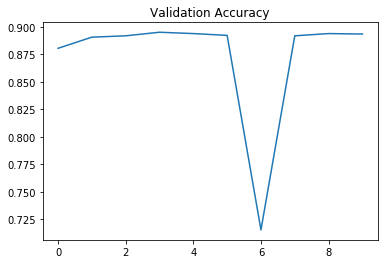

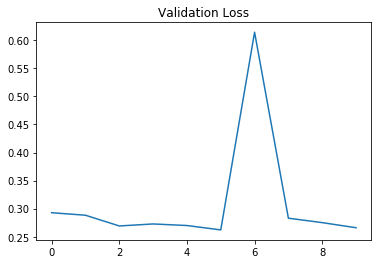

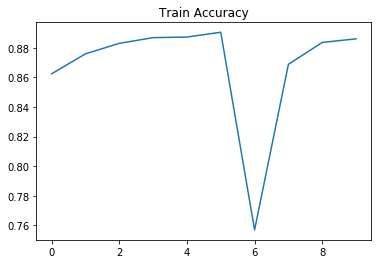

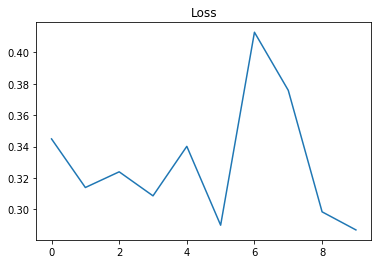

In [54]:
model_2 = keras.models.Sequential()
neurons2 = [48,36,24,18,12,6,3,2]
for layer_2 in neurons2:
    model_2.add(layers.Dense(input_dim=X_train.shape[1],units=layer_2,activation='relu'))
model_2.add(layers.Dense(units=1,activation='sigmoid'))
optimizer2 = optimizers.RMSprop(lr=0.003)
model_2.compile(optimizer2,loss='binary_crossentropy',metrics=['accuracy'])
results_of_model2 = model_1.fit(X_train,y_train,epochs = 10,validation_data=[X_test,y_test],verbose=1)
plot_metrics(results_of_model2.history)

Train on 9864 samples, validate on 2466 samples
Epoch 1/10
9864/9864 [==============================] - 1s 84us/step - loss: 0.2822 - acc: 0.8893 - val_loss: 0.2578 - val_acc: 0.8885
Epoch 2/10
9864/9864 [==============================] - 1s 57us/step - loss: 0.3013 - acc: 0.8906 - val_loss: 0.2563 - val_acc: 0.8905
Epoch 3/10
9864/9864 [==============================] - 1s 59us/step - loss: 0.2767 - acc: 0.8923 - val_loss: 0.2641 - val_acc: 0.8889
Epoch 4/10
9864/9864 [==============================] - 1s 57us/step - loss: 0.2890 - acc: 0.8909 - val_loss: 0.2560 - val_acc: 0.8865
Epoch 5/10
9864/9864 [==============================] - 1s 56us/step - loss: 0.2703 - acc: 0.8916 - val_loss: 0.2503 - val_acc: 0.8877
Epoch 6/10
9864/9864 [==============================] - 1s 56us/step - loss: 0.2751 - acc: 0.8919 - val_loss: 0.2634 - val_acc: 0.8877
Epoch 7/10
9864/9864 [==============================] - 1s 58us/step - loss: 0.2720 - acc: 0.8913 - val_loss: 0.2489 - val_acc: 0.8877
Epoch 8

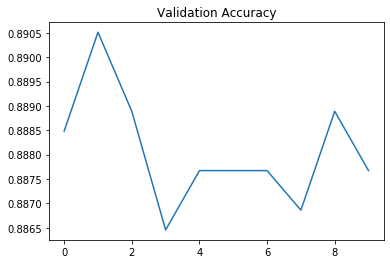

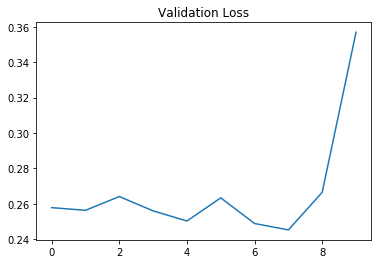

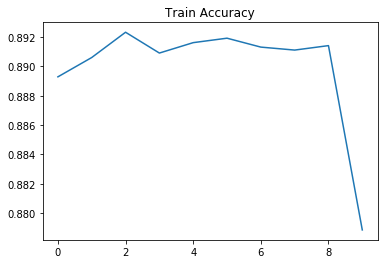

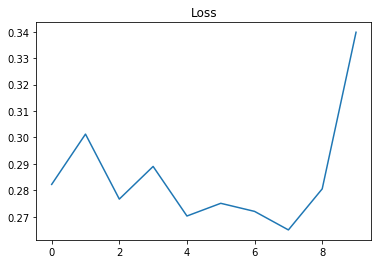

In [55]:
model_3 = keras.models.Sequential()
neurons3 = [5,4,3,2,1,2,3,4,5]
for layer_3 in neurons3:
    model_3.add(layers.Dense(input_dim=X_train.shape[1],units=layer_3,activation='relu'))
model_3.add(layers.Dense(units=1,activation='softmax'))
optimizer3 = optimizers.Adamax(lr=0.000003)
model_3.compile(optimizer3,loss='binary_crossentropy',metrics=['accuracy'])
results_of_model3 = model_1.fit(X_train,y_train,epochs = 10,validation_data=[X_test,y_test],verbose=1)
plot_metrics(results_of_model3.history)

## Explanation of Codes and how it is used on my Data
- First I have split the data into train and test with 80-20 ratio.
- Then I initialize the each model with differnet layers and differnt number of neurons in each layer.
- For every layer in the network, input dimensions and activation functions are specified using a loop.
- A single unit is used as the final output is a single value of target and hence expects a single neuron.
- The network is compiled with a loss function and measurement metrics.
- First model has 5 layers and activation function used is tanh.
- Second model has 8 layers and activation functions used are ReLU and Sigmoid.
- Third model has 9 layers and activation functions used are ReLU and softmax.


# IV - Results

## Presents the results of applications of your deep networks.
I have plotted plots of application of networks just below the models in Methods section


## Visualize the results  


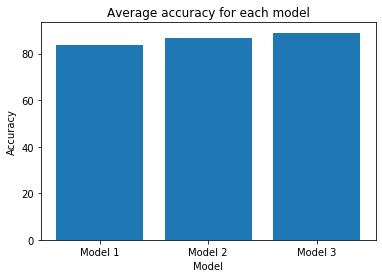

In [56]:
avg_acc_model1 = 100*sum(results_of_model1.history["acc"])/float(len(results_of_model1.history["acc"]))
avg_acc_model2 = 100*sum(results_of_model2.history["acc"])/float(len(results_of_model2.history["acc"]))
avg_acc_model3 = 100*sum(results_of_model3.history["acc"])/float(len(results_of_model3.history["acc"]))
avg_acc = [avg_acc_model1,avg_acc_model2,avg_acc_model3]
plt.bar( [1,2,3], avg_acc)
plt.xticks([1,2,3],["Model 1","Model 2","Model 3"])
plt.title("Average accuracy for each model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

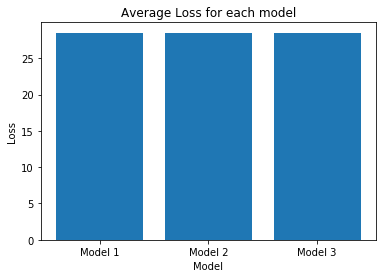

In [57]:
avg_loss_model1 = 100*sum(results_of_model3.history["loss"])/float(len(results_of_model1.history["loss"]))
avg_loss_model2 = 100*sum(results_of_model3.history["loss"])/float(len(results_of_model2.history["loss"]))
avg_loss_model3 = 100*sum(results_of_model3.history["loss"])/float(len(results_of_model3.history["loss"]))
avg_loss = [avg_loss_model1,avg_loss_model2,avg_loss_model3]
plt.bar( [1,2,3], avg_loss)
plt.xticks([1,2,3],["Model 1","Model 2","Model 3"])
plt.title("Average Loss for each model")
plt.xlabel("Model")
plt.ylabel("Loss")
plt.show()

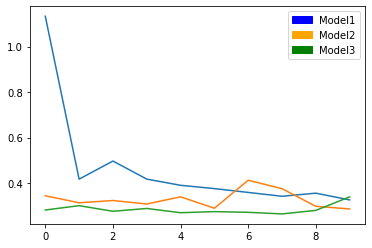

In [58]:
plt.plot(results_of_model1.history['loss'])
plt.plot(results_of_model2.history['loss'])
plt.plot(results_of_model3.history['loss'])

bp = mpatches.Patch(color = 'blue', label = 'Model1')
yp = mpatches.Patch(color = 'orange', label = 'Model2')
gp = mpatches.Patch(color = 'green', label = 'Model3')

plt.legend(handles=[bp,yp,gp])
plt.show()

## What do you think about the results? 

- Taking a look at the accuracies of the model, it is clear that 3rd model with pallindrome neurons has the heighest accuracy. 
- Though the accuracy differs, the average loss is almost same in all the models.


# Conclusions

- I learned in depth about deep learning and differnt network structures in it. 
- I learned about Keras and TensorFlow and how to apply it.
- I learned about the different effects of parameters like activation function and optimizer used.
- One of the challenges that I faced was installation of tensorflow. So I completed the assignment on Google Colab.


# References
1. UCI Machine Learning Repository: Online Shoppers Purchasing Intention Dataset Data Set, https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset Shoppers Purchasing Intention Dataset.
2. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, https://keras.io/.
3. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Deep Learning.ipynb.

In [59]:
total_time_required = timeit.default_timer() - start_time
total_time_required

27.70735753200006

# Extra Credit

## Opt 1

In [61]:
print('Time taken without GPU  =  36.092154999998456')
print('Time taken with GPU  =  27.70735753200006')

Time taken without GPU  =  36.092154999998456
Time taken with GPU  =  27.70735753200006


## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
1 | Second structure (implementation, explanation, plot results, discussion of results)
1 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 